In [1]:
import pandas as pd
from statsmodels.formula.api import ols as sm_ols
import numpy as np
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col # nicer tables

In [2]:
link = 'input_data2/housing_train.csv'
house_train = pd.read_csv(link)
#house_train

## Part 1: EDA

_Insert cells as needed below to write a short EDA/data section that summarizes the data for someone who has never opened it before._ 
- Answer essential questions about the dataset (observation units, time period, sample size, many of the questions above) 
- Note any issues you have with the data (variable X has problem Y that needs to get addressed before using it in regressions or a prediction model because Z)
- Present any visual results you think are interesting or important

### After performing EDA analysis, we can make some conclusions:
- The unit of observation that we are exploring is the sales price on houses.

- The time span covered depends on what we are looking at. Since we are observing the housing prices, we consider the time period of when houses were sold. In our case, the time span for houses sold ranges from 2006 to 2008.

- The shape of the dataset is 1,941 rows and 81 columns. Out of the 81 variables, 37 were numerical. That implies that 44 of the variables were categorical.

- There are some minor data errors that occur. For exampple, our housing_data_description file says that our sales price variable is defined as SalesPrice, while in reality the dataset has it defined as v_SalePrice. 

- If there were zero NaN values, the total count would be 1941. When we look at the describe table, we can see the total count of each variable. Out of the 37 numerical variables, 27 had null values. A list of each varaible's amount of Nan vaues are listed below.

- The data types of the variables include object, int64 and float64. They vary between nominal, ordinal, discrete and continuous.

Looking at the housing_data_description file, we get the following: 

- Discrete Variables (14): v_Year_Built, v_Year_Remod/Add, v_Bsmt_Full_Bath, v_Bsmt_Half_Bath, v_Full_Bath, v_Half_Bath, v_Bedroom, v_Kitchen, v_Tot_Rms_Abv_Grd, v_Fireplaces, v_Garage_Yr_Blt, v_Garage_Cars, v_Mo_Sold, v_Yr_Sold

- Continuous Variables (26): v_Lot_Frontage, v_Lot_Area, v_Mas_Vnr_Area, v_BsmtFin_F_, v_Bsmt_Fin_SF_2, v_Bsmt_Unf_SF, v_Total_Bsmt_SF, v_1st_Flr_SF, v_2nd_Flr_SF, v_Low_Qual_Fin_SF, v_Gr_Liv_Area, v_Garage_Area, v_Wood_Deck_SF, v_Open_Porch_SF, v_Enclosed_Porch, v_3Ssn_Porch, v_Screen_Porch, v_Pool_Area, v_Misc_Val, v_SalePrice

- Categorical variables: the rest of the variables that are nominal/ordinal. Note that v_Yr_Sold could be interpreted as categorical even though it has numerical values because it is grouped by the year the house is sold.

- The categorical ordering is important for some of the variables. For example, v_Overall_Qual and v_Overall_Cond are meaningful since the higher the number, the higher the quality and condition of the house. It should be related such that the higher the number, the higher the sale price. 

In [3]:
def insufficient_but_starting_eda(house_train, cat_vars_list=None):
    '''
    
    Parameters
    ----------
    df : DATAFRAME
    cat_vars_list : LIST, optional
        A list of strings containing variable names in the dataframe
        for variables where you want to see the number of unique values
        and the 10 most common values. Likely used for categorical values.
    Returns
    -------
    None. It simply prints.
    
    Description
    -------    
    This function will print a MINIMUM amount of info about a new dataframe. 
    
    You should ****look**** at all this output below and consider the data
    exploration and cleaning questions from 
    https://ledatascifi.github.io/ledatascifi-2021/content/03/02e_eda_golden.html#member
    
    Also LOOK at more of the data manually. 
    
    Then write up anything notable you observe.
    
    TIP: put this function in your codebook to reuse easily.
    
    PROTIP: Improve this function (better outputs, better formatting).
    
    FEATURE REQUEST: optionally print the nunique and top 10 values under the describe matrix
    
    FEATURE REQUEST: optionally print more stats (percentiles)
    
    '''
    print(house_train.head(),  '\n---')
    print(house_train.tail(),  '\n---')
    print(house_train.columns, '\n---')
    print("The shape is: ",house_train.shape, '\n---')
    print("The type is: ",house_train.dtypes, '\n---')
    print("Info:",house_train.info(), '\n---') # memory usage, name, dtype, and # of non-null obs (--> # of missing obs) per variable
    print(house_train.describe(), '\n---') # summary stats, and you can customize the list!
    if cat_vars_list != None:
        for var in cat_vars_list:
            print(var,"has",house_train[var].nunique(),"values and its top 10 most common are:")
            print(house_train[var].value_counts().head(10), '\n---')
            
            
print(insufficient_but_starting_eda(house_train))

           parcel  v_MS_SubClass v_MS_Zoning  v_Lot_Frontage  v_Lot_Area  \
0  1056_528110080             20          RL           107.0       13891   
1  1055_528108150             20          RL            98.0       12704   
2  1053_528104050             20          RL           114.0       14803   
3  2213_909275160             20          RL           126.0       13108   
4  1051_528102030             20          RL            96.0       12444   

  v_Street v_Alley v_Lot_Shape v_Land_Contour v_Utilities  ... v_Pool_Area  \
0     Pave     NaN         Reg            Lvl      AllPub  ...           0   
1     Pave     NaN         Reg            Lvl      AllPub  ...           0   
2     Pave     NaN         Reg            Lvl      AllPub  ...           0   
3     Pave     NaN         IR2            HLS      AllPub  ...           0   
4     Pave     NaN         Reg            Lvl      AllPub  ...           0   

  v_Pool_QC v_Fence v_Misc_Feature v_Misc_Val v_Mo_Sold v_Yr_Sold  \
0    

In [4]:
house_train.describe().T

,count,mean,std,min,25%,50%,75%,max
v_MS_SubClass,1941.0,58.088614,42.946015,20.0,20.00,50.0,70.00,190.0
v_Lot_Frontage,1620.0,69.301235,23.978101,21.0,58.00,68.0,80.00,313.0
v_Lot_Area,1941.0,10284.770222,7832.295527,1470.0,7420.00,9450.0,11631.00,164660.0
v_Overall_Qual,1941.0,6.113344,1.401594,1.0,5.00,6.0,7.00,10.0
v_Overall_Cond,1941.0,5.568264,1.087465,1.0,5.00,5.0,6.00,9.0
v_Year_Built,1941.0,1971.321999,30.209933,1872.0,1953.00,1973.0,2001.00,2008.0
v_Year_Remod/Add,1941.0,1984.073158,20.837338,1950.0,1965.00,1993.0,2004.00,2009.0
v_Mas_Vnr_Area,1923.0,104.846074,184.982611,0.0,0.00,0.0,168.00,1600.0
v_BsmtFin_SF_1,1940.0,436.986598,457.815715,0.0,0.00,361.5,735.25,5644.0
v_BsmtFin_SF_2,1940.0,49.247938,169.555232,0.0,0.00,0.0,0.00,1474.0


In [5]:
nullin_df = pd.DataFrame(house_train)
#print(house_train.isnull().sum()) #v_Lot_Frontage has 321 null values 

### Variables with null values 
- v_Lot_Frontage: 321
- v_Alley: 1805
- v_Mas_Vnr_Type: 18
- v_Mas_Vnr_Area: 18
- v_Bsmt_Qual: 50
- v_Bsmt_Cond: 50
- v_Bsmt_Exposure: 52
- v_BsmtFin_Type_1: 50
- v_BsmtFin_SF_1: 1
- v_BsmtFin_Type_2: 50
- v_BsmtFin_SF_2: 1
- v_Bsmt_Unf_SF: 1
- v_Total_Bsmt_SF: 1
- v_Electrical: 1
- v_Bsmt_Full_Bath: 2
- v_Bsmt_Half_Bath: 2
- v_Fireplace_Qu: 940
- v_Garage_Type: 105
- v_Garage_Yr_Blt: 107
- v_Garage_Finish: 107
- v_Garage_Cars: 1
- v_Garage_Area: 1
- v_Garage_Qual: 107
- v_Garage_Cond: 107
- v_Pool_QC: 1928
- v_Fence: 1576
- v_Misc_Feature: 1878

### Continuous Variables
Looking at the relationship between sales price and some of our continuous varaibles, we can draw some initial conclusions...
- most of the graphs below seem to appear linear.
- It is difficult to get a good read on v_Lot_Area and v_BsmtFin_SF_2. These relationships does not seem to appear linear

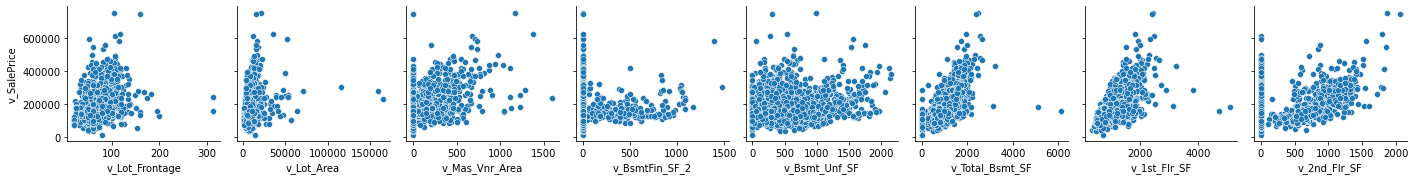

In [6]:
#continuous varaibles: 
sns.pairplot(data=house_train,
                  y_vars=['v_SalePrice'],
                  x_vars=['v_Lot_Frontage', 'v_Lot_Area', 'v_Mas_Vnr_Area',
                          'v_BsmtFin_SF_2', 'v_Bsmt_Unf_SF', 'v_Total_Bsmt_SF', 'v_1st_Flr_SF', 'v_2nd_Flr_SF'])


### Categorical Variables
Looking at the relationship between sales price and two of what I believe are the more important categorical varaibles to measure, we can draw some conclusions.
- As the overall condition of the houses improves, the sales price seems to also increase. However, when the overall condition is 5, the median sales price is the highest compared to the rest of the conditional levels. Also notice extremely high outliers for the overall condition for 5 and 6. We can make the inference that some other variable is caushing this effect.

- While looking at the overall quality of the houses, we see a trend that makes more intuitive sense. As the overall quality of the houses increase, we see the IQR sales price increase in a somewhat exponential rate. That is, the better the quality the more expensive it will sell at. 

<AxesSubplot:xlabel='v_Overall_Cond', ylabel='v_SalePrice'>

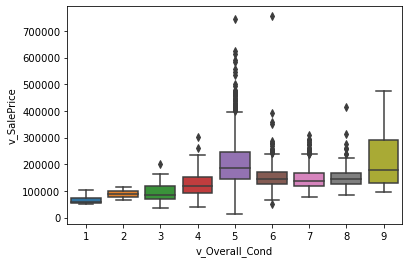

In [7]:
#continuous varaibles: 
sns.boxplot(x='v_Overall_Cond', y='v_SalePrice', data=house_train)

<AxesSubplot:xlabel='v_Overall_Qual', ylabel='v_SalePrice'>

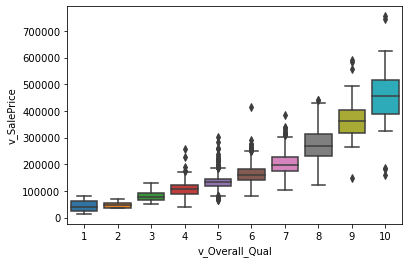

In [8]:
sns.boxplot(x='v_Overall_Qual', y='v_SalePrice', data=house_train)

## Part 2: Running Regressions

**Unless otherwise specified, run these regressions on the RAW data, even if you found data issues that you think should be addressed.**

_Insert cells as needed below to run these regressions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * \text{v_1st_Flr_SF}$
1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * log(\text{v_1st_Flr_SF})$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_1st_Flr_SF}$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * log(\text{v_1st_Flr_SF})$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Yr_Sold}$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * (\text{v_Yr_Sold==2007})+ \beta_2 * (\text{v_Yr_Sold==2008})$
1. Choose your own adventure: Pick any five variables from the dataset that you think will generate good R2. Use them in a regression of $log(\text{Sale Price}_{i,t})$ 
    - Tip: You can transform/create these five variables however you want, even if it creates extra variables. For example: I'd count Model 6 above as only using one variable: `v_Yr_Sold`.
    - I got an R2 of 0.877 with just "5" variables. How close can you get? I won't be shocked if someone beats that!
    

**Bonus formatting trick:** Instead of reporting all regressions separately, report all seven regressions in a _single_ table using `summary_col`.


In [9]:
#1)

one = sm_ols('v_SalePrice ~  v_1st_Flr_SF ', data=house_train).fit()
one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            v_SalePrice   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     1102.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          8.77e-192
Time:                        17:43:25   Log-Likelihood:                -24240.
No. Observations:                1941   AIC:                         4.848e+04
Df Residuals:                    1939   BIC:                         4.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.044e+04   4506.886      8.972      0.000    3.16e+04    4.93e+04
v_1st_Flr_SF   121.9546      3.673     33.203      0.000     114.751     129.158
==============================================================================
Omnibus:                      414.013   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3393.548
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       9.293   Cond. No.                     3.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#2) 
house_train['LOG_v_1st_Flr_SF'] = np.log(house_train['v_1st_Flr_SF'])

two = sm_ols('v_SalePrice ~  LOG_v_1st_Flr_SF ', data=house_train).fit()
two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            v_SalePrice   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          2.80e-189
Time:                        17:43:25   Log-Likelihood:                -24246.
No. Observations:                1941   AIC:                         4.850e+04
Df Residuals:                    1939   BIC:                         4.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -8.661e+05   3.19e+04    -27.182      0.000   -9.29e+05   -8.04e+05
LOG_v_1st_Flr_SF  1.496e+05   4543.937     32.930      0.000    1.41e+05    1.59e+05
==============================================================================
Omnibus:                      525.196   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2110.251
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       7.441   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#3) 

house_train['LOG_v_SalePrice'] = np.log(house_train['v_SalePrice'])

three = sm_ols('LOG_v_SalePrice ~ v_1st_Flr_SF ', data=house_train).fit()
three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LOG_v_SalePrice   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1050.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          2.08e-184
Time:                        17:43:25   Log-Likelihood:                -572.10
No. Observations:                1941   AIC:                             1148.
Df Residuals:                    1939   BIC:                             1159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.3293      0.023    496.583      0.000      11.285      11.374
v_1st_Flr_SF     0.0006   1.86e-05     32.398      0.000       0.001       0.001
==============================================================================
Omnibus:                      259.592   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1079.950
Skew:                          -0.589   Prob(JB):                    3.10e-235
Kurtosis:                       6.459   Cond. No.                     3.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#4) 
four = sm_ols('LOG_v_SalePrice ~ LOG_v_1st_Flr_SF ', data=house_train).fit()
four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LOG_v_SalePrice   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          3.65e-203
Time:                        17:43:25   Log-Likelihood:                -528.90
No. Observations:                1941   AIC:                             1062.
Df Residuals:                    1939   BIC:                             1073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6189      0.157     42.086      0.000       6.311       6.927
LOG_v_1st_Flr_SF     0.7723      0.022     34.434      0.000       0.728       0.816
==============================================================================
Omnibus:                       72.141   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.145
Skew:                          -0.237   Prob(JB):                     2.49e-33
Kurtosis:                       4.278   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#5) 

five = sm_ols('LOG_v_SalePrice ~ v_Yr_Sold ', data=house_train).fit()
five.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LOG_v_SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2003
Date:                Sun, 11 Apr 2021   Prob (F-statistic):              0.655
Time:                        17:43:25   Log-Likelihood:                -991.88
No. Observations:                1941   AIC:                             1988.
Df Residuals:                    1939   BIC:                             1999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2932     22.937      0.972      0.331     -22.690      67.277
v_Yr_Sold     -0.0051      0.011     -0.448      0.655      -0.028       0.017
==============================================================================
Omnibus:                       55.641   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.833
Skew:                           0.075   Prob(JB):                     2.36e-29
Kurtosis:                       4.268   Cond. No.                     5.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
house_train_query = house_train.query('v_Yr_Sold == 2007 or v_Yr_Sold == 2008')
# house_train_query['v_Yr_Sold'].describe()


#2007 col: 1 if sold, 0 otherwise
#2008 col: 1 if sold, 0 otherwise 

dummy = pd.get_dummies(house_train_query['v_Yr_Sold']) #can add drop_first=True so that only 1 col shows up where 1 if 2008, 0 if 2007
#dummy
Merge = pd.merge(house_train_query, dummy, left_index=True, right_index=True)
#Merge.head()
#dummy
#Merge


# six = sm_ols('LOG_v_SalePrice ~ v_Yr_Sold ** 2007 + v_Yr_Sold ** 2008 ', data=Merge).fit()
# six.summary()

In [15]:
six = sm_ols('LOG_v_SalePrice ~ C(v_Yr_Sold) ', data=house_train).fit()
six.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LOG_v_SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.394
Date:                Sun, 11 Apr 2021   Prob (F-statistic):              0.248
Time:                        17:43:25   Log-Likelihood:                -990.59
No. Observations:                1941   AIC:                             1987.
Df Residuals:                    1938   BIC:                             2004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.0229      0.016    745.087      0.000      11.991      12.055
C(v_Yr_Sold)[T.2007]     0.0256      0.022      1.150      0.250      -0.018       0.069
C(v_Yr_Sold)[T.2008]    -0.0103      0.023     -0.450      0.653      -0.055       0.035
==============================================================================
Omnibus:                       54.618   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.342
Skew:                           0.080   Prob(JB):                     2.23e-28
Kurtosis:                       4.245   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

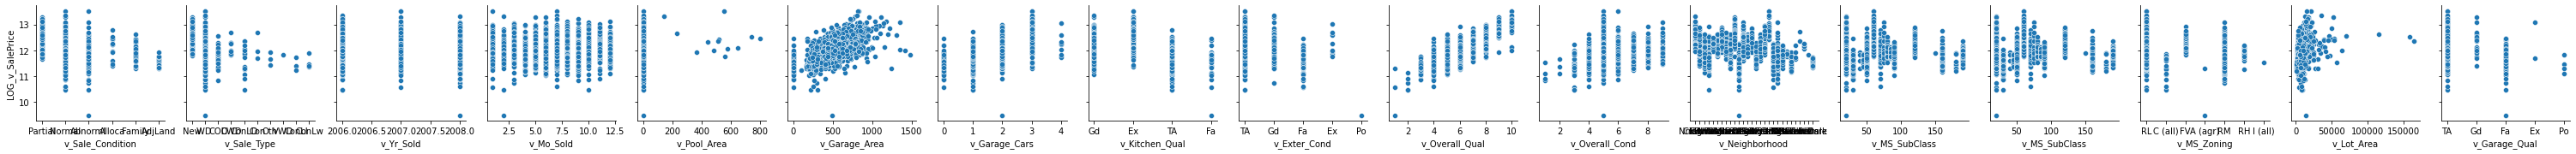

In [16]:
#7 regress 5 variables on the log sales variable 
#lets first see the relationship between log sales and numerous independent variables...

sns.pairplot(data=house_train,
                  y_vars=['LOG_v_SalePrice'],
                  x_vars=['v_Sale_Condition', 'v_Sale_Type', 'v_Yr_Sold', 'v_Mo_Sold','v_Pool_Area',
                          'v_Garage_Area','v_Garage_Cars','v_Kitchen_Qual', 
                          'v_Exter_Cond','v_Overall_Qual', 'v_Overall_Cond', 'v_Neighborhood', 'v_MS_SubClass', 
                          'v_MS_SubClass', 'v_MS_Zoning', 'v_Lot_Area', 'v_Garage_Qual'])


In [17]:
# sm_ols('LOG_v_SalePrice ~ v_Garage_Area + v_Garage_Cars + C(v_Overall_Qual) + C(v_Overall_Cond) ', data=house_train_query).fit().summary()
seven = sm_ols('LOG_v_SalePrice ~ v_Pool_Area + v_Garage_Area + v_Garage_Cars + v_Overall_Qual + v_Overall_Cond ', data=house_train_query).fit()
seven.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LOG_v_SalePrice   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     716.0
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:43:28   Log-Likelihood:                 208.22
No. Observations:                1315   AIC:                            -404.4
Df Residuals:                    1309   BIC:                            -373.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4731      0.042    248.092      0.000      10.390      10.556
v_Pool_Area        0.0002      0.000      1.171      0.242      -0.000       0.001
v_Garage_Area      0.0002   5.65e-05      4.301      0.000       0.000       0.000
v_Garage_Cars      0.0965      0.017      5.759      0.000       0.064       0.129
v_Overall_Qual     0.1864      0.005     36.925      0.000       0.176       0.196
v_Overall_Cond     0.0233      0.005      4.418      0.000       0.013       0.034
==============================================================================
Omnibus:                      186.107   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.325
Skew:                          -0.479   Prob(JB):                    3.30e-254
Kurtosis:                       7.515   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

BONUS: put all regresions outputs into 1 summary table 

In [18]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'Adj R-squared' : lambda x: f"{x.rsquared_adj:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}


# This summary col function combines a bunch of regressions into one nice table
print('='*108)
print('                  y = sales, log(interest rate else)')
print(summary_col(results=[one, two, three, four, five, six, seven],
                  float_format='%0.2f',
                  stars = True, # stars are easy way to see if anything is statistically significant
                  model_names=['1','2 (log)','3','4 (log)','5','6', '7'], # these are bad names, lol. Usually, just use the y variable name
                  info_dict=info_dict,
                  )
     )

                  y = sales, log(interest rate else)

                          1         2 (log)       3     4 (log)    5       6        7    
-----------------------------------------------------------------------------------------
C(v_Yr_Sold)[T.2007]                                                    0.03             
                                                                        (0.02)           
C(v_Yr_Sold)[T.2008]                                                    -0.01            
                                                                        (0.02)           
Intercept            40435.21*** -866085.93*** 11.33*** 6.62*** 22.29   12.02*** 10.47***
                     (4506.89)   (31862.17)    (0.02)   (0.16)  (22.94) (0.02)   (0.04)  
LOG_v_1st_Flr_SF                 149632.27***           0.77***                          
                                 (4543.94)              (0.02)                           
R-squared            0.36        0.36         

## Part 3: Regression interpretation

_Insert cells as needed below to answer these questions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. List $\beta_1$ for Models 1-6 to make it easier on your graders.
1. Interpret $\beta_1$ in Model 2. 
1. Interpret $\beta_1$ in Model 3. 
1. Of models 1-4, which do you think best explains the data and why?
1. Interpret $\beta_1$ In Model 5
1. Interpret $\alpha$ and $\beta_1$ in Model 6
1. Why is the R2 of Model 6 higher than the R2 of Model 5?
1. Speculate (not graded): Could you use the specification of Model 6 in a predictive regression? How about Model 5?
1. What is the R2 of your Model 7?



| Model | B_1 (Intercept) | Interpretation |
| --- | --- | --- |
| One | 121.9546 | If first floor square feet increases by 1, sales price increases by 121.9546 |
| Two | 1.496e+05 | If first floor square feet increases by 1%, the sales price will increase by 1,496  |
| Three | 0.0006 | If first floor square feet increases by 1, sales price increases by 0.06% |
| Four | 0.7723 | If first floor square feet increases by 1%, sales price increases by 0.7723% |
| Five | -0.0051 | If the year the house is sold increases by 1, sale price will decrease by 0.051% |
| Six | 0.0256 | Sales price is ~2.56% higher on average for cases when the year sold is 2007 compared with 2006 |

for Questions 1, 2, 3, 5 --> see table above

4) Between models 1-4, Model 4 best explains the data. It has a correlation coefficient (R^2) of 0.379, the highest of the 4. This implies that Model 4 best explains the relationship. It also has the lowest AIC, which measures how well our model fits teh data. The lower the AIC, the better the model selection. Model 4's test statistic and p_value are also statistically significant, which is what we were hoping to see.

6) As explained in the table above for model 6:
- B1 (0.0256): Sales price is ~2.56% higher on average for cases when the year sold is 2007 compared to 2006
- alpha (12.0229): The average log sales price is ~12.03 for houses sold in 2006

7) R2 is higher in Model 6 than model 5 becasue it takes an additional regressor into the equation. If you have an additional variable and coefficient, the model is using an additional variable to make a prediction. Typically, the greater the number of regressors, the greater the R2 value. However, this can lead to overfitting. 

8) No. Both model 5 and 6 have statistically insignificant results. Our p-value is simply too large to many any reasonable conslusions about the predictive regression. 

9) My R2 in model 7 was 0.732... ~73% of the variation in Sales Price can be explained by the 5 variables I included

In [19]:
#TEST TO SEE IF MY INTERPRETATION OF ALPHA IS CORRECT FOR #6

test = house_train.query('v_Yr_Sold == 2006')
test['LOG_v_SalePrice'].mean()

12.02286921075194